In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.utils import plot_model

# load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


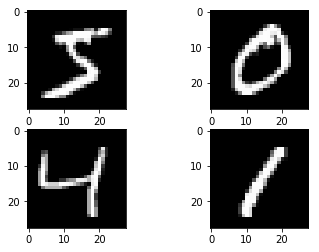

In [2]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()


In [3]:
#flatten 28*28 images
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [5]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
#define baseline model
def baseline_model():
	seed = 7
	numpy.random.seed(seed)
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(500, kernel_initializer='normal', activation='relu'))
	model.add(Dense(300, kernel_initializer='normal', activation='relu'))
	model.add(Dense(300, kernel_initializer='normal', activation='relu'))
	model.add(Dense(200, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [9]:
# run this cell to load the trained model
model1= load_model('hidden_5_500_300_300_200_adam_relu100ep.hdf5')
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

Baseline Error: 1.46%
Accuracy: 98.54%
What is this??: 13.33%


In [11]:
# run this cell to train the model from the beginning
# build the model
model = baseline_model()
print(model.summary())
checkpoint = ModelCheckpoint('check.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
history =model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128, callbacks=callbacks_list, verbose=2)
# Final evaluation of the model
model= load_model('check.hdf5')
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_8 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_9 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_10 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_11 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2010      
Total params: 1,310,750
Trainable params: 1,310,750
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()